In [2]:
#필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
import platform
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['axes.unicode_minus'] = False

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

### Decision Tree

- 분류, 회귀에 널리 사용하는 모델이며 이해하기 쉽다.
- feature별 True, False로 나누어 문제를 해결

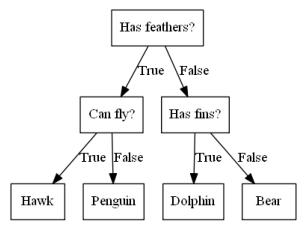

In [4]:
mglearn.plots.plot_animal_tree()

### Decision Tree Classification

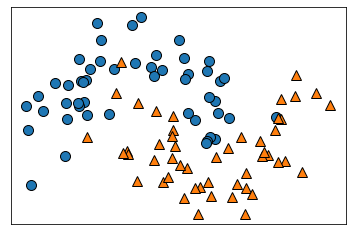

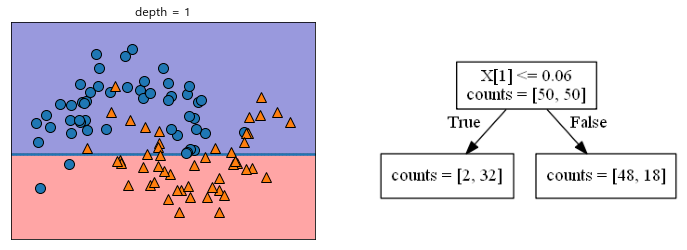

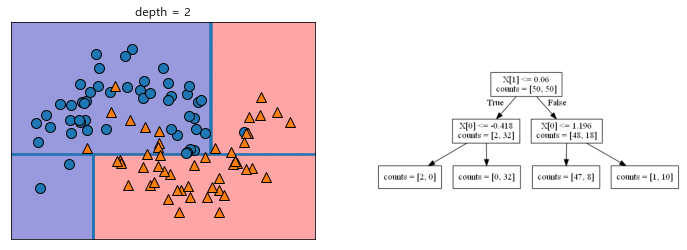

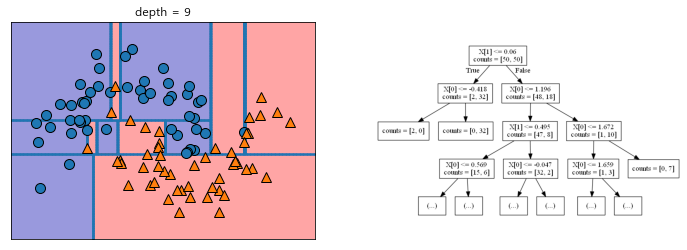

In [5]:
mglearn.plots.plot_tree_progressive()

### 결정 트리 복잡도 제어

- **모든 리프가 순수 노드가 될 때 까지 진행**하면 모델은 복잡해지고 **`과대 적합`**이 된다.
- 과대적합 막는 방법
    - **pre pruning(사전 가지치기)** 
        - 트리 생성을 미리 중단
    - **post pruning(사후 가지치기)**
        - 트리를 다 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병함
        
#### 1) 사전 가치지치

- 트리의 최대 깊이나 최대 갯수를 제한하거나 노드가 분할하기 위한 포인트의 최소 갯수를 지정하는 것

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


- 모든 리프가 순수 노드이므로 train 정확도 : $100\%$ => **과대적합**

In [7]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


- max_depth를 이용하여 최대 깊이를 4로 지정한 모델
- train의 정확도는 줄었지만, test의 정확도가 올라갔으므로 더 좋은 모델이라고 볼 수 있다.

### Tree visualization

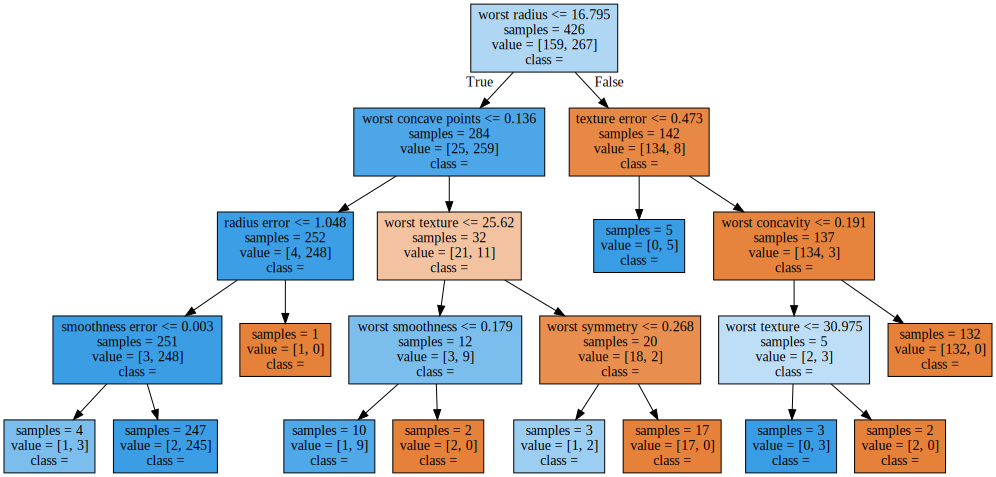

In [12]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["악성","양성"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

with open("tree.dot", encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

### Feature Importance


> - **각 feature가 얼마나 중요한지를 평가하는 `feature importance`를 확인**
- 0~1 사이의 값이며, 클수록 완벽하게 타깃 클래스를 예측한 것
> ####  **주의할 점**  : <br> 
- feature_importance 값이 낮다고 아에 중요하지 않은 값은 아니다. 
- 단지 모델을 사용할 때 사용되지 않은 것 뿐이다.

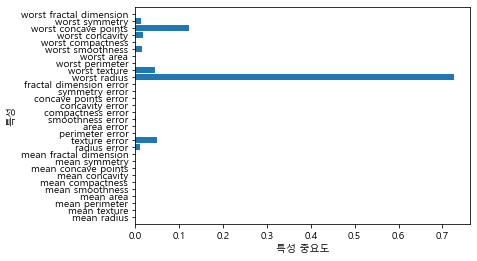

In [14]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

### Decision Tree Regression

- 구간별 예측 값 산출
- 단점 : train의 범위 밖에 있는 데이터는 예측 불가능

Text(0, 0.5, '가격 ($/Mbyte)')

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


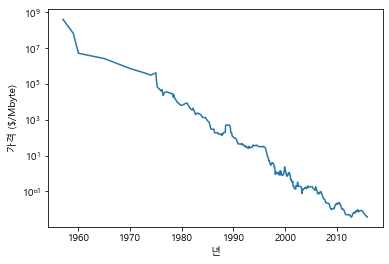

In [16]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로
data_train = ram_prices[ram_prices.date < 2000]
data_test  = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다.
X_train = data_train.date[:, np.newaxis]

# 데이터와 타깃 관계를 간단하기 위해 로그 스케일로 바꿉니다.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다.
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr   = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다.
price_tree = np.exp(pred_tree)
price_lr   = np.exp(pred_lr)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


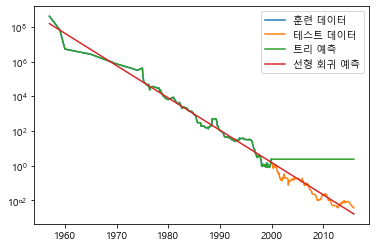

In [18]:
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형 회귀 예측")
plt.legend()

- 선형회귀는 회귀 식으로 train의 방향과 비슷한 방향으로 가지만 Decision Tree Classification은 train에서 나오지 않은 값이 나와 예측이 되지 않음을 볼 수 있다.


### 매개변수 & 장단점

- 과대 적합을 막기위한 3개의 매개 변수가 존재
    - max_depth
    - max_leaf_nodes
    - min_simple_leaf
    
#### Decision Tree 장점

- 만들어진 모델을 쉽게 시각화 가능하므로 비 전문가도 이해하기 수월
- 데이터의 크리에 구애 받지 않는다.
- 각 feature간의 연산이 없고 개별적으로 처리되어 정규화, 표준화 같은 전치리 과정이 의미없다.

#### Decision Tree 단점

- 매개변수를 조절해 가지치기를 해도 과대적합되는 경향이 있어 일반적인 성능은 좋지 않다.
- 대안으로 **Random Forest** 모델로 단일 결정 트리를 대체한다.